# Bloopers

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint
df=pd.read_csv('/Users/lota/Downloads/ss1.csv',nrows=15911)
import opencc
import jieba
import stopwordsiso as stopwords
stopword=stopwords.stopwords(["zh"])
cc = opencc.OpenCC('s2hk')
chinesestop=[]
for i in stopword:
    chinesestop.append(cc.convert(i))
text_file = open("/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/stoplist.txt", "r")
chinesesto = text_file.read().split('\n')
chinesestop.extend(chinesesto)
jieba.set_dictionary('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt')
jieba.load_userdict('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebaself.txt')
df['comment']=df['comment'].apply(lambda x:   [word for word in jieba.cut(x) if word not in chinesestop]   )
df

Using TensorFlow backend.


KeyboardInterrupt: 

# Serious Word2Vec Senti

In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint
df=pd.read_csv('/Users/lota/Downloads/ss1.csv',nrows=15911)
df['sentiment'].value_counts()

/opt/anaconda3/envs/webscrap/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


0    9214
1    6697
Name: sentiment, dtype: int64

In [2]:
df

,level_0,comment,reply,no_of_stars,sentiment,intent,intent1
0,25990,訂2盒 但只收到一盒 請cs 跟進補送退款 thanks,抱歉聽到閣下嘅情況我哋已經收到閣下退換貨品嘅申請已有同事為您完成跟進有關個案02134776...,1.0,0,退款,1
1,2749,送到包裝底部已開口申請退貨但話無貨唯有申請退款申請中唔會再買,抱歉聽到閣下情況我地已經收到閣下申請退換貨品既申請cs同事正為你跟進事件00900679請你...,1.0,0,退款,1
2,28143,送到來d苦瓜是爛的好彩有得退款,對於是次貨品品質方面為您造成不便小編喺度先同您講聲唔好意思啊 我哋已經收到閣下退換貨品嘅申...,1.0,0,退款,1
3,1884,送貨欠送還未有跟進會補送或退錢,我們抱歉得悉閣下的情況收貨7天內您可使用我們的全新回報問題介面去回報這情況並選擇解決方案此自...,1.0,0,退款,1
4,32778,送到來包裝破爛梳打粉流出請退錢,NaN,1.0,0,退款,1
...,...,...,...,...,...,...,...
15906,23882,sorry 對你地完全失望你仍欠我一件貨物如再不處理報警處理 奉勸各位别再上當上佢地fb看...,NaN,1.0,0,抱怨,5
15907,20080,買左呢款同淺藍色個款淺藍色個款有個藍開箱時已裂開仲未有人回覆,抱歉得知您的情況有關您所遇到的問題我們現在為您調查中小編會安排cs同事稍後時間聯絡您跟進謝謝您,1.0,0,抱怨,5
15908,4479,sorry this scale doesnt work at all i put aaa ...,sorry to hear that customer can use our brand ...,1.0,0,抱怨,5
15909,15359,買左兩支其中一支果蓋開左,抱歉聽到閣下情況我地已經收到閣下申請退換貨品既申請已有同事為你跟進事件00974450 有關...,1.0,0,抱怨,5


In [2]:
my_tags=df['sentiment'].unique()

In [3]:
def intent(word):
    if word==0:
        x = '負面'
    else:
        x = '正面'
    return x
        
df['sentiment'] = df['sentiment'].apply(intent)
df['sentiment'].value_counts()

負面    9214
正面    6697
Name: sentiment, dtype: int64

In [6]:
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['plot'])
    predictions = classifier.predict(data_features)
    target = data['tag']
    evaluate_prediction(predictions, target)
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions, labels=my_tags)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

In [ ]:
df.shape

In [8]:
df.index = range(15911)
train, test = train_test_split(df, test_size=0.3, random_state=42)
df['comment']

0                             訂2盒 但只收到一盒 請cs 跟進補送退款 thanks
1                           送到包裝底部已開口申請退貨但話無貨唯有申請退款申請中唔會再買
2                                          送到來d苦瓜是爛的好彩有得退款
3                                          送貨欠送還未有跟進會補送或退錢
4                                          送到來包裝破爛梳打粉流出請退錢
                               ...                        
15906    sorry  對你地完全失望你仍欠我一件貨物如再不處理報警處理 奉勸各位别再上當上佢地fb看...
15907                       買左呢款同淺藍色個款淺藍色個款有個藍開箱時已裂開仲未有人回覆
15908    sorry this scale doesnt work at all i put aaa ...
15909                                         買左兩支其中一支果蓋開左
15910                             買左兩張有一張用到另外一張完全用唔到煩請代為跟進
Name: comment, Length: 15911, dtype: object

In [9]:
# %%time 
# wv =gensim.models.Word2Vec.load("/Users/lota/Downloads/zhwiki-latest-pages-articles-multistream.xml.bz2")
# wv.init_sims(replace=True)

In [10]:
# %%time 
# wv =gensim.models.KeyedVectors.load_word2vec_format(
#  "/Users/lota/Downloads/zhwiki-latest-pages-articles-multistream.xml.bz2",binary=True)
# wv.init_sims(replace=True)

In [11]:
def getText():
    x=list(df['comment'])
    return x
text=getText()

In [12]:
import opencc
import jieba
import stopwordsiso as stopwords
stopword=stopwords.stopwords(["zh"])
cc = opencc.OpenCC('s2hk')
chinesestop=[]
for i in stopword:
    chinesestop.append(cc.convert(i))
text_file = open("/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/stoplist.txt", "r")
chinesesto = text_file.read().split('\n')
chinesestop.extend(chinesesto)
jieba.set_dictionary('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt')
jieba.load_userdict('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebaself.txt')
def cut_sentence(text):
    result=[]
    for i in text:
        i_result=[word for word in jieba.cut(i) if word not in chinesestop]
        result.append(i_result)
    return result
    

Building prefix dict from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt ...
2020-07-30 14:11:52,601 : DEBUG : Building prefix dict from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt ...
Loading model from cache /var/folders/3f/yhx45phn2sn39bch7yhk8nsm0000gn/T/jieba.u00720bb44aeb0955f50bcb15d9032aa3.cache
2020-07-30 14:11:52,613 : DEBUG : Loading model from cache /var/folders/3f/yhx45phn2sn39bch7yhk8nsm0000gn/T/jieba.u00720bb44aeb0955f50bcb15d9032aa3.cache
Loading model cost 1.301 seconds.
2020-07-30 14:11:53,914 : DEBUG : Loading model cost 1.301 seconds.
Prefix dict has been built successfully.
2020-07-30 14:11:53,916 : DEBUG : Prefix dict has been built successfully.


In [14]:
cleaned_words=cut_sentence(text)
cleaned_words

[['一盒', '跟進', '補送', '退款', 'thanks'],
 ['包裝', '底部', '開口', '申請', '退貨', '但話', '無貨', '申請退款', '申請', '唔會'],
 ['苦瓜', '是爛', '好彩', '退款'],
 ['欠送', '還未', '跟進', '補送', '退錢'],
 ['包裝', '破爛', '梳', '打粉', '流出', '退錢'],
 ['不凍', '要求退貨', '退錢'],
 ['漏咗單', '唔認', '唔補發', '唔退款', '極差'],
 ['的時候',
  '膠蓋',
  '破損',
  '令人',
  '莫名奇妙',
  '密封',
  '錫紙',
  '照片',
  '要求退款',
  '換貨',
  '不知道',
  '問題',
  '問題',
  '建議',
  '重新',
  '審視',
  '關係'],
 ['包裝好',
  '污糟',
  '離譜',
  '杯麵',
  '裡面',
  '濕',
  '有水',
  '有油',
  '紙杯',
  '底爛',
  '晒',
  '唔食得',
  '紙碟',
  '包裝',
  '裡面',
  '濕晒',
  '碟',
  '有水',
  '有油',
  '離譜',
  '訂部',
  '無水',
  '無油',
  '水同油',
  '係咩',
  '好恐怖',
  '不能接受',
  '請將',
  '杯麵',
  '紙碟',
  '退貨',
  '退錢'],
 ['正版',
  '圖片',
  '圖五為',
  '第一',
  '官方',
  'made',
  'in',
  'china',
  '木柄',
  '紋理',
  '正版',
  '相差',
  '人造',
  '木才',
  '短',
  '密集',
  '紋',
  '點第',
  '梳子',
  '幾處',
  '膠漬',
  '無法',
  '清潔',
  '官方',
  '令人',
  '起疑',
  '翻版',
  '退款'],
 ['間野',
  '態度',
  '串到',
  '唔係',
  '安排',
  '網到',
  '指定',
  '唔',
  '時間',
  '聯絡',
  '間',
  '佢地',
  '講想',
  '指定',

In [15]:
wv= Word2Vec()
wv.build_vocab(cleaned_words)
wv.train(cleaned_words,total_examples = wv.corpus_count,epochs = wv.epochs)

2020-07-30 14:12:14,428 : INFO : collecting all words and their counts
2020-07-30 14:12:14,429 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-07-30 14:12:14,512 : INFO : PROGRESS: at sentence #10000, processed 115368 words, keeping 21845 word types
2020-07-30 14:12:14,537 : INFO : collected 27100 word types from a corpus of 157729 raw words and 15911 sentences
2020-07-30 14:12:14,542 : INFO : Loading a fresh vocabulary
2020-07-30 14:12:14,570 : INFO : effective_min_count=5 retains 4533 unique words (16% of original 27100, drops 22567)
2020-07-30 14:12:14,575 : INFO : effective_min_count=5 leaves 125013 word corpus (79% of original 157729, drops 32716)
2020-07-30 14:12:14,601 : INFO : deleting the raw counts dictionary of 27100 items
2020-07-30 14:12:14,603 : INFO : sample=0.001 downsamples 31 most-common words
2020-07-30 14:12:14,604 : INFO : downsampling leaves estimated 116513 word corpus (93.2% of prior 125013)
2020-07-30 14:12:14,627 : INFO : estima

(582584, 788645)

In [19]:
wv.wv.save_word2vec_format('visme2')
# python -m gensim.scripts.word2vec2tensor --input visme2 --output visme2

# put in embedding projector

2020-07-30 15:05:19,758 : INFO : storing 4533x100 projection weights into visme2


In [21]:
# wv.save('visme')

2020-07-30 14:00:59,238 : INFO : saving Word2Vec object under visme, separately None
2020-07-30 14:00:59,246 : INFO : not storing attribute vectors_norm
2020-07-30 14:00:59,253 : INFO : not storing attribute cum_table
2020-07-30 14:00:59,263 : INFO : saved visme


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4533 samples in 0.033s...
[t-SNE] Computed neighbors for 4533 samples in 0.717s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4533
[t-SNE] Computed conditional probabilities for sample 2000 / 4533
[t-SNE] Computed conditional probabilities for sample 3000 / 4533
[t-SNE] Computed conditional probabilities for sample 4000 / 4533
[t-SNE] Computed conditional probabilities for sample 4533 / 4533
[t-SNE] Mean sigma: 0.013305
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.277847
[t-SNE] KL divergence after 1000 iterations: 0.888277


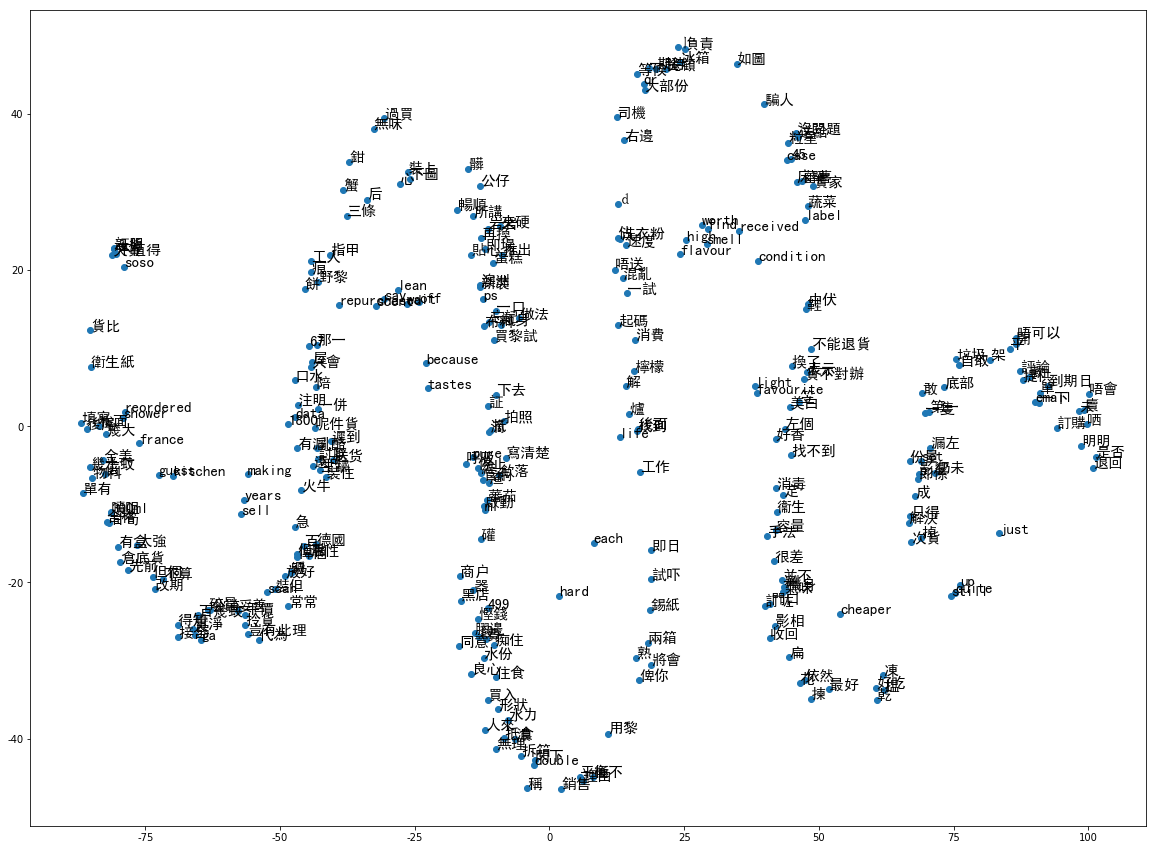

In [17]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib as mpl

# 若要显示中文字体则取消注释下面两行
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
# 解决负号'-'显示为方块的问题
rcParams['axes.unicode_minus']=False
myfont = FontProperties(fname='/opt/anaconda3/envs/gpt2/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf',
 size=15)
#因为词向量文件比较大，全部可视化就什么都看不见了，所以随机抽取一些词可视化
words = list(wv.wv.vocab)
random.shuffle(words)
 
vector = wv.wv[words]
tsne = TSNE(n_components=2,init='pca',verbose=1)
embedd = tsne.fit_transform(vector)
 
#可视化
plt.figure(figsize=(20,15))
plt.scatter(embedd[:300,0], embedd[:300,1])
 
for i in range(300):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i], fontproperties=myfont)
plt.show()

In [15]:
%%time 
wv =gensim.models.Word2Vec.load(
    "/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt")
wv.init_sims(replace=True)

2020-07-16 13:12:06,939 : INFO : loading Word2Vec object from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt
2020-07-16 13:12:06,979 : INFO : loading wv recursively from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt.wv.* with mmap=None
2020-07-16 13:12:06,980 : INFO : setting ignored attribute vectors_norm to None
2020-07-16 13:12:06,981 : INFO : loading vocabulary recursively from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt.vocabulary.* with mmap=None
2020-07-16 13:12:06,985 : INFO : loading trainables recursively from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt.trainables.* with mmap=None
2020-07-16 13:12:06,988 : INFO : setting ignored attribute cum_table to None
2020-07-16 13:12:06,989 : INFO : loaded /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt
2020-07-16 13:12:07,007 : INFO : precomputing L2-norms of word weight vector

CPU times: user 53.4 ms, sys: 10.6 ms, total: 64 ms
Wall time: 72.1 ms


In [33]:

def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.wv.vocab:
            mean.append(wv.wv.vectors_norm[wv.wv.vocab[word].index])
            all_words.add(wv.wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

In [18]:
import nltk
import jieba
import opencc
import jieba
import stopwordsiso as stopwords
stopword=stopwords.stopwords(["zh"])
cc = opencc.OpenCC('s2hk')
chinesestop=[]
for i in stopword:
    chinesestop.append(cc.convert(i))
text_file = open("/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/stoplist.txt", "r")
chinesesto = text_file.read().split('\n')
chinesestop.extend(chinesesto)
jieba.set_dictionary('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt')
jieba.load_userdict('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebaself.txt')
from nltk.corpus import stopwords
def w2v_tokenize_text(text):
    tokens=[word for word in jieba.cut(text) if word not in chinesestop]
    return tokens

Building prefix dict from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt ...
2020-07-16 13:12:07,165 : DEBUG : Building prefix dict from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt ...
Loading model from cache /var/folders/3f/yhx45phn2sn39bch7yhk8nsm0000gn/T/jieba.u00720bb44aeb0955f50bcb15d9032aa3.cache
2020-07-16 13:12:07,169 : DEBUG : Loading model from cache /var/folders/3f/yhx45phn2sn39bch7yhk8nsm0000gn/T/jieba.u00720bb44aeb0955f50bcb15d9032aa3.cache
Loading model cost 0.733 seconds.
2020-07-16 13:12:07,901 : DEBUG : Loading model cost 0.733 seconds.
Prefix dict has been built successfully.
2020-07-16 13:12:07,906 : DEBUG : Prefix dict has been built successfully.


In [19]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

In [20]:
test_tokenized = test_data.apply(lambda r: w2v_tokenize_text(r['comment']), axis=1).values
train_tokenized = train_data.apply(lambda r: w2v_tokenize_text(r['comment']), axis=1).values

In [54]:
%%time
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

2020-07-16 13:39:55,170 : WARNING : cannot compute similarity with no input ['夠味']
2020-07-16 13:39:55,184 : WARNING : cannot compute similarity with no input ['okgood']
2020-07-16 13:39:55,226 : WARNING : cannot compute similarity with no input []
2020-07-16 13:39:55,232 : WARNING : cannot compute similarity with no input ['變晒形']
2020-07-16 13:39:55,242 : WARNING : cannot compute similarity with no input ['ok25']
2020-07-16 13:39:55,245 : WARNING : cannot compute similarity with no input ['願', '置評']
2020-07-16 13:39:55,246 : WARNING : cannot compute similarity with no input ['smokey']
2020-07-16 13:39:55,268 : WARNING : cannot compute similarity with no input ['repurposed']
2020-07-16 13:39:55,299 : WARNING : cannot compute similarity with no input ['碎粒']
2020-07-16 13:39:55,309 : WARNING : cannot compute similarity with no input ['okokok']
2020-07-16 13:39:55,319 : WARNING : cannot compute similarity with no input ['全是爛']
2020-07-16 13:39:55,335 : WARNING : cannot compute similarity 

2020-07-16 13:39:56,270 : WARNING : cannot compute similarity with no input ['方便麵']
2020-07-16 13:39:56,298 : WARNING : cannot compute similarity with no input ['nl']
2020-07-16 13:39:56,300 : WARNING : cannot compute similarity with no input ['okla']
2020-07-16 13:39:56,316 : WARNING : cannot compute similarity with no input ['夾唔']
2020-07-16 13:39:56,319 : WARNING : cannot compute similarity with no input ['想象']
2020-07-16 13:39:56,330 : WARNING : cannot compute similarity with no input ['okok']
2020-07-16 13:39:56,357 : WARNING : cannot compute similarity with no input ['整潔']
2020-07-16 13:39:56,360 : WARNING : cannot compute similarity with no input ['recommanded']
2020-07-16 13:39:56,370 : WARNING : cannot compute similarity with no input ['有粒']
2020-07-16 13:39:56,383 : WARNING : cannot compute similarity with no input ['乾得']
2020-07-16 13:39:56,396 : WARNING : cannot compute similarity with no input ['有些爛', '很靓']
2020-07-16 13:39:56,406 : WARNING : cannot compute similarity with

CPU times: user 1.47 s, sys: 291 ms, total: 1.76 s
Wall time: 2.1 s


In [53]:
test_data.iloc()[19]['comment']

'師傅盡責換埋fuse只是安裝費500'

In [22]:
%%time
knn_naive_dv = KNeighborsClassifier(n_neighbors=3, n_jobs=1, algorithm='brute', metric='cosine' )
knn_naive_dv.fit(X_train_word_average, train_data['sentiment'])

CPU times: user 17.8 ms, sys: 2.38 ms, total: 20.2 ms
Wall time: 18.4 ms


KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=1,
                     n_neighbors=3)

In [23]:
%%time
predicted = knn_naive_dv.predict(X_test_word_average)

CPU times: user 1.15 s, sys: 305 ms, total: 1.45 s
Wall time: 607 ms


In [24]:
print('accuracy %s' % accuracy_score(test_data['sentiment'], predicted))

accuracy 0.7638190954773869


In [45]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=-1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_data['sentiment'])
predicted = logreg.predict(X_test_word_average)

CPU times: user 169 ms, sys: 93.6 ms, total: 263 ms
Wall time: 2.99 s


In [46]:
print('accuracy %s' % accuracy_score(test_data['sentiment'], predicted))

accuracy 0.8021356783919598


In [27]:
predicted[0]

'正面'

In [28]:
test_data.iloc()[56]['comment']

'第一次買 粉多亦口感較硬'

In [29]:
wv.wv.most_similar(positive=[X_test_word_average[56]], restrict_vocab=100000, topn=30)[0:20]

[('次訂', 0.9804049730300903),
 ('次試', 0.9784411787986755),
 ('之前', 0.9765802621841431),
 ('上次', 0.9749930500984192),
 ('開', 0.9718470573425293),
 ('幾平', 0.9708478450775146),
 ('回購', 0.9694547057151794),
 ('遇到', 0.9680535793304443),
 ('見到', 0.9663573503494263),
 ('次用', 0.9653743505477905),
 ('意', 0.9640436172485352),
 ('輪', 0.9635957479476929),
 ('嗰', 0.9621239900588989),
 ('先買', 0.9613754153251648),
 ('凹', 0.961200475692749),
 ('嘢', 0.960771918296814),
 ('原來', 0.9601157903671265),
 ('樽', 0.9593881964683533),
 ('百幾蚊', 0.95926833152771),
 ('見', 0.9584986567497253)]

In [38]:
cc=word_averaging_list(wv,['不好吃'])
logreg.predict(cc)

array(['負面'], dtype=object)

In [41]:
cc=word_averaging_list(wv,['good'])
logreg.predict(cc)

array(['正面'], dtype=object)

In [36]:
cc=word_averaging_list(wv,['退貨退錢'])
logreg.predict(cc)

array(['負面'], dtype=object)

In [57]:
cc=word_averaging_list(wv,['多謝'])
logreg.predict(cc)

array(['負面'], dtype=object)

In [90]:
data.to_csv('/Users/lota/Downloads/ss13.csv', encoding = 'utf——8——sig')

# Serious Word2Vec Intent

In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint
df=pd.read_csv('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/refreshforintent.csv')
df['intent'].value_counts()

/opt/anaconda3/envs/webscrap/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


退貨｜退款    10428
反饋       10000
好評       10000
疑問        5180
Name: intent, dtype: int64

In [2]:
my_tags=df['intent'].unique()

In [3]:
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['plot'])
    predictions = classifier.predict(data_features)
    target = data['tag']
    evaluate_prediction(predictions, target)

In [4]:
df.shape


(35608, 8)

In [6]:
df.index = range(35608)
train, test = train_test_split(df, test_size=0.3, random_state=42)
df['comment']

0                                                   商品纸盒殘舊
1                                            果實很細小這個價錢不會再買
2        個鏟上面嘅招紙用水浸成日卒之可以除掉但係仍然留有膠水漬咁樣掃咗垃圾上去個鏟會黐實啲垃圾不能清...
3          今剛收到這綠色三層儲物櫃 但內裏欠兩旁的所有支撐長方柱 可看附圖 請盡快安排補回所欠配件 謝謝
4                                 好明顯細卷過超市賣緊果d 按下去鬆泡泡下次唔會買
                               ...                        
35603                                               方便易用抵買
35604                                              方便用效果不錯
35605                                      旅行用開見平買多兩set好好用
35606                                         方便適合出外旅行顏色美麗
35607                                                 撞到扁晒
Name: comment, Length: 35608, dtype: object

In [77]:
# %%time 
# wv =gensim.models.Word2Vec.load(
#     "/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt")
# wv.init_sims(replace=True)

In [7]:
def getText():
    x=list(df['comment'])
    return x
text=getText()

In [8]:
import opencc
import jieba
import stopwordsiso as stopwords
text_file = open("/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/stoplist.txt", "r")
chinesestop = text_file.read().split('\n')
# jieba.set_dictionary('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt')
jieba.load_userdict('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebaself.txt')
def cut_sentence(text):
    result=[]
    for i in text:
        i_result=[word for word in jieba.cut(i) if word not in chinesestop]
        result.append(i_result)
    return result
    

Building prefix dict from the default dictionary ...
2020-07-31 10:25:57,854 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/3f/yhx45phn2sn39bch7yhk8nsm0000gn/T/jieba.cache
2020-07-31 10:25:57,856 : DEBUG : Loading model from cache /var/folders/3f/yhx45phn2sn39bch7yhk8nsm0000gn/T/jieba.cache
Loading model cost 0.966 seconds.
2020-07-31 10:25:58,822 : DEBUG : Loading model cost 0.966 seconds.
Prefix dict has been built successfully.
2020-07-31 10:25:58,824 : DEBUG : Prefix dict has been built successfully.


In [9]:
cleaned_words=cut_sentence(text)
cleaned_words

[['商品', '纸盒', '殘舊'],
 ['果實', '很細', '小', '這個', '價錢', '不會', '再', '買'],
 ['個',
  '鏟',
  '上面',
  '招',
  '紙',
  '用',
  '水浸',
  '成日',
  '卒之',
  '可以',
  '除掉',
  '但係',
  '仍然',
  '留有',
  '膠水',
  '漬',
  '咁',
  '樣掃',
  '咗',
  '垃圾',
  '上去',
  '個',
  '鏟',
  '會',
  '黐實',
  '垃圾',
  '不能',
  '清理',
  '生產',
  '商用',
  '膠水',
  '幫',
  '我',
  '問',
  '佢',
  '有',
  '無',
  '解決',
  '方法'],
 ['今剛',
  '收到',
  '這',
  '綠色',
  '三層',
  '儲物櫃',
  ' ',
  '但',
  '內',
  '裏',
  '欠',
  '兩旁',
  '所有',
  '支撐',
  '長',
  '方柱',
  ' ',
  '可看',
  '附圖',
  ' ',
  '請',
  '盡快',
  '安排',
  '補回',
  '所欠',
  '配件',
  ' ',
  '謝謝'],
 ['好',
  '明顯',
  '細卷過',
  '超市',
  '賣',
  '緊果',
  ' ',
  '按',
  '下去',
  '鬆',
  '泡泡',
  '下次',
  '唔會',
  '買'],
 ['太貴', '而且', '件', '扒', '有', '四份', '一是', '肥膏', '唔', '抵買'],
 ['至少',
  '有',
  '8',
  '罐是',
  '凹',
  '了',
  '另外',
  '一罐',
  '罐面',
  '是',
  '黑色',
  '的紙',
  '皮箱',
  '也',
  '是',
  '濕',
  '之前',
  '也',
  '有',
  '訂過',
  '沒有',
  '這些',
  '問題'],
 ['太薄', '不夠', '濕', '後悔', '買了', '3', '包'],
 ['以為', '有汁', '係', '裡面', '原來', '冇', 

In [10]:
wv= Word2Vec()
wv.build_vocab(cleaned_words)
wv.train(cleaned_words,total_examples = wv.corpus_count,epochs = wv.epochs)

2020-07-31 10:26:08,918 : INFO : collecting all words and their counts
2020-07-31 10:26:08,920 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-07-31 10:26:08,958 : INFO : PROGRESS: at sentence #10000, processed 150388 words, keeping 19590 word types
2020-07-31 10:26:09,010 : INFO : PROGRESS: at sentence #20000, processed 350847 words, keeping 34191 word types
2020-07-31 10:26:09,049 : INFO : PROGRESS: at sentence #30000, processed 503369 words, keeping 43305 word types
2020-07-31 10:26:09,065 : INFO : collected 46039 word types from a corpus of 545540 raw words and 35608 sentences
2020-07-31 10:26:09,067 : INFO : Loading a fresh vocabulary
2020-07-31 10:26:09,113 : INFO : effective_min_count=5 retains 8025 unique words (17% of original 46039, drops 38014)
2020-07-31 10:26:09,114 : INFO : effective_min_count=5 leaves 491432 word corpus (90% of original 545540, drops 54108)
2020-07-31 10:26:09,139 : INFO : deleting the raw counts dictionary of 46039 items


(2065486, 2727700)

In [17]:
wv.save('justtesting.txt')

2020-07-31 10:27:41,186 : INFO : saving Word2Vec object under justtesting.txt, separately None
2020-07-31 10:27:41,188 : INFO : not storing attribute vectors_norm
2020-07-31 10:27:41,191 : INFO : not storing attribute cum_table
2020-07-31 10:27:41,300 : INFO : saved justtesting.txt


In [18]:
%%time 
wv =gensim.models.Word2Vec.load(
    "/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt")
wv.init_sims(replace=True)

2020-07-31 10:27:41,612 : INFO : loading Word2Vec object from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt
2020-07-31 10:27:41,683 : INFO : loading wv recursively from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt.wv.* with mmap=None
2020-07-31 10:27:41,684 : INFO : setting ignored attribute vectors_norm to None
2020-07-31 10:27:41,687 : INFO : loading vocabulary recursively from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt.vocabulary.* with mmap=None
2020-07-31 10:27:41,689 : INFO : loading trainables recursively from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt.trainables.* with mmap=None
2020-07-31 10:27:41,690 : INFO : setting ignored attribute cum_table to None
2020-07-31 10:27:41,696 : INFO : loaded /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousNotebook/justtesting.txt
2020-07-31 10:27:41,732 : INFO : precomputing L2-norms of word weight vector

CPU times: user 95.3 ms, sys: 20.1 ms, total: 115 ms
Wall time: 127 ms


In [19]:

def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.wv.vocab:
            mean.append(wv.wv.vectors_norm[wv.wv.vocab[word].index])
            all_words.add(wv.wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

In [20]:
import opencc
import jieba
import stopwordsiso as stopwords
text_file = open("/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/stoplist.txt", "r")
chinesestop = text_file.read().split('\n')
jieba.set_dictionary('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt')
jieba.load_userdict('/Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebaself.txt')
from nltk.corpus import stopwords
def w2v_tokenize_text(text):
    tokens=[word for word in jieba.cut(text) if word not in chinesestop]
    return tokens

Building prefix dict from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt ...
2020-07-31 10:27:42,703 : DEBUG : Building prefix dict from /Users/lota/Downloads/SuccessNlpMoneyCantBuy/PreciousData/jiebadict.txt ...
Loading model from cache /var/folders/3f/yhx45phn2sn39bch7yhk8nsm0000gn/T/jieba.u00720bb44aeb0955f50bcb15d9032aa3.cache
2020-07-31 10:27:42,709 : DEBUG : Loading model from cache /var/folders/3f/yhx45phn2sn39bch7yhk8nsm0000gn/T/jieba.u00720bb44aeb0955f50bcb15d9032aa3.cache
Loading model cost 0.682 seconds.
2020-07-31 10:27:43,392 : DEBUG : Loading model cost 0.682 seconds.
Prefix dict has been built successfully.
2020-07-31 10:27:43,393 : DEBUG : Prefix dict has been built successfully.


In [21]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

In [22]:
test_tokenized = test_data.apply(lambda r: w2v_tokenize_text(r['comment']), axis=1).values
train_tokenized = train_data.apply(lambda r: w2v_tokenize_text(r['comment']), axis=1).values

In [23]:
%%time
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

2020-07-31 10:27:52,492 : WARNING : cannot compute similarity with no input ['正番', '訂多次']
2020-07-31 10:27:52,502 : WARNING : cannot compute similarity with no input ['正義']
2020-07-31 10:27:52,543 : WARNING : cannot compute similarity with no input ['有根']
2020-07-31 10:27:52,545 : WARNING : cannot compute similarity with no input ['挺香']
2020-07-31 10:27:52,551 : WARNING : cannot compute similarity with no input ['買三送', '一少', '左一盒']
2020-07-31 10:27:52,563 : WARNING : cannot compute similarity with no input ['有紫', '薯味']
2020-07-31 10:27:52,569 : WARNING : cannot compute similarity with no input ['太重粉']
2020-07-31 10:27:52,578 : WARNING : cannot compute similarity with no input ['有箱', '頭筆', '筆漬']
2020-07-31 10:27:52,581 : WARNING : cannot compute similarity with no input ['正評']
2020-07-31 10:27:52,588 : WARNING : cannot compute similarity with no input ['好小冷風']
2020-07-31 10:27:52,590 : WARNING : cannot compute similarity with no input ['蔬晒氣']
2020-07-31 10:27:52,625 : WARNING : cannot c

2020-07-31 10:27:53,888 : WARNING : cannot compute similarity with no input ['拉鍊', '拉不到']
2020-07-31 10:27:53,890 : WARNING : cannot compute similarity with no input ['新爽']
2020-07-31 10:27:53,926 : WARNING : cannot compute similarity with no input ['抵食平']
2020-07-31 10:27:53,950 : WARNING : cannot compute similarity with no input ['比卫康贵']
2020-07-31 10:27:53,958 : WARNING : cannot compute similarity with no input ['正米']
2020-07-31 10:27:53,976 : WARNING : cannot compute similarity with no input ['簡體字', '淘寶']
2020-07-31 10:27:53,981 : WARNING : cannot compute similarity with no input ['糧少']
2020-07-31 10:27:54,012 : WARNING : cannot compute similarity with no input ['勁細']
2020-07-31 10:27:54,037 : WARNING : cannot compute similarity with no input ['掛重', '夠力']
2020-07-31 10:27:54,038 : WARNING : cannot compute similarity with no input ['抵飲開']
2020-07-31 10:27:54,057 : WARNING : cannot compute similarity with no input ['條繩', '好易斷']
2020-07-31 10:27:54,058 : WARNING : cannot compute simil

2020-07-31 10:27:55,486 : WARNING : cannot compute similarity with no input ['太韌']
2020-07-31 10:27:55,489 : WARNING : cannot compute similarity with no input ['棒棒', '噠']
2020-07-31 10:27:55,519 : WARNING : cannot compute similarity with no input ['棒棒']
2020-07-31 10:27:55,528 : WARNING : cannot compute similarity with no input ['正野']
2020-07-31 10:27:55,553 : WARNING : cannot compute similarity with no input ['搶灘']
2020-07-31 10:27:55,568 : WARNING : cannot compute similarity with no input ['極品']
2020-07-31 10:27:55,574 : WARNING : cannot compute similarity with no input ['日用品']
2020-07-31 10:27:55,595 : WARNING : cannot compute similarity with no input ['好细個']
2020-07-31 10:27:55,603 : WARNING : cannot compute similarity with no input ['正入貨']
2020-07-31 10:27:55,627 : WARNING : cannot compute similarity with no input ['勁細支']
2020-07-31 10:27:55,646 : WARNING : cannot compute similarity with no input ['好蘇']
2020-07-31 10:27:55,652 : WARNING : cannot compute similarity with no input ['

CPU times: user 3.36 s, sys: 313 ms, total: 3.67 s
Wall time: 4.17 s


In [89]:
test_data.iloc()[19]['comment']

'5月送貨來食用期2018打開用有嗌味唔食得'

In [90]:
%%time
knn_naive_dv = KNeighborsClassifier(n_neighbors=3, n_jobs=1, algorithm='brute', metric='cosine' )
knn_naive_dv.fit(X_train_word_average, train_data['intent'])

CPU times: user 19.1 ms, sys: 1.56 ms, total: 20.6 ms
Wall time: 19.6 ms


KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=1,
                     n_neighbors=3)

In [91]:
%%time
predicted = knn_naive_dv.predict(X_test_word_average)

CPU times: user 1.27 s, sys: 591 ms, total: 1.86 s
Wall time: 1.13 s


In [92]:
print('accuracy %s' % accuracy_score(test_data['sentiment'], predicted))

accuracy 0.0


In [26]:
logreg = linear_model.LogisticRegression(n_jobs=-1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_data['intent'])
predicted = logreg.predict(X_test_word_average)

In [36]:
train_data['intent']

12299       疑問
7945        反饋
14802       疑問
28770       好評
7652        反饋
         ...  
16850    退貨｜退款
6265        反饋
11284       疑問
860         反饋
15795    退貨｜退款
Name: intent, Length: 32047, dtype: object

In [27]:
print('accuracy %s' % accuracy_score(test_data['intent'], predicted))

accuracy 0.5658522886829542


In [28]:
predicted[0]

'退貨｜退款'

In [96]:
test_data.iloc()[56]['comment']

'都係唔夠香放廁所都冇香味要近聞才有所以作用不大'

In [97]:
wv.wv.most_similar(positive=[X_test_word_average[56]], restrict_vocab=100000, topn=30)[0:20]

[('勁', 0.9998292922973633),
 ('點知', 0.9998250007629395),
 ('粒', 0.9998070001602173),
 ('仲', 0.9998064041137695),
 ('唔夠', 0.9998008608818054),
 ('bb', 0.9997967481613159),
 ('好耐', 0.999794065952301),
 ('成', 0.9997937083244324),
 ('度', 0.999788761138916),
 ('唔得', 0.9997857213020325),
 ('紙箱', 0.9997789859771729),
 ('黎', 0.9997784495353699),
 ('未試過', 0.9997779726982117),
 ('焗', 0.9997753500938416),
 ('煮', 0.9997732639312744),
 ('口感', 0.9997710585594177),
 ('走', 0.9997708797454834),
 ('曬', 0.9997694492340088),
 ('仲有', 0.9997693300247192),
 ('雪', 0.9997674226760864)]

In [29]:
cc=word_averaging_list(wv,['不好吃'])
logreg.predict(cc)

array(['反饋'], dtype=object)

In [30]:
cc=word_averaging_list(wv,['good'])
logreg.predict(cc)

array(['反饋'], dtype=object)

In [31]:
cc=word_averaging_list(wv,['退錢'])
logreg.predict(cc)

array(['退貨｜退款'], dtype=object)

In [32]:
cc=word_averaging_list(wv,['唔要唔洗'])
logreg.predict(cc)

array(['反饋'], dtype=object)

In [33]:
cc=word_averaging_list(wv,['很好'])
logreg.predict(cc)

array(['好評'], dtype=object)

In [34]:
from sklearn.svm import LinearSVC
svmmodel = LinearSVC().fit(X_train_word_average, train_data['intent'])
svmpredict = svmmodel.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(test_data['intent'], predicted))

accuracy 0.5658522886829542
